# sprint 深層学習スクラッチ ニューラルネットワーク

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 2.MNISTデータセット

ニューラルネットワークスクラッチの検証にはMNISTデータセットを使用します。各種ライブラリやサイトからダウンロードできますが、ここでは深層学習フレームワークのKerasを用います。以下のコードを実行すればデータセットをダウンロードし、展開まで行えます。

In [152]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# データセットの確認
どういったデータなのかを見てみます。

In [153]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

# 平滑化
(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、 平滑化（flatten） してあるという風に表現します。

In [154]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# 画像データの可視化
画像データを可視化します。plt.imshowに渡します。

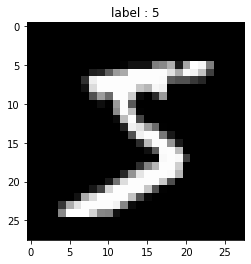

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

## 発展的話題》


画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。



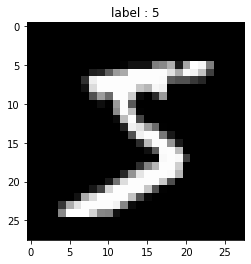

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [156]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。

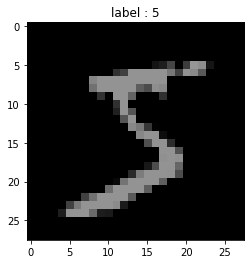

In [157]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
plt.title('label : {}'.format(y_train[index]))
plt.show()

# 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

In [158]:
# バイアス項の追加
X_train = np.concatenate([np.ones([X_train.shape[0], 1]), X_train], axis=1)
X_test = np.concatenate([np.ones([X_test.shape[0], 1]), X_test], axis=1)
print(X_train.shape)
print(X_test.shape)

(60000, 785)
(10000, 785)


In [159]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には one-hot表現 に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

In [160]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = enc.fit_transform(y_train[:, np.newaxis])
y_test = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train.shape) # (60000, 10)
print(y_train.dtype) # float64

(60000, 10)
(60000, 10)
float64


In [161]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

さらに、訓練データ6万枚の内2割を検証データとして分割してください。訓練データが48000枚、検証データが12000枚となります。

In [162]:
# y_train_one_hotを分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 785)
(12000, 785)


# 3.ニューラルネットワークスクラッチ

ニューラルネットワークのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


今回は多クラス分類を行う3層のニューラルネットワークを作成します。層の数などは固定した上でニューラルネットワークの基本を学びます。次のSprintで層を自由に変えられる設計にしていきます。


以下に雛形を用意してあります。このScratchSimpleNeuralNetrowkClassifierクラスにコードを書き加えていってください。

In [317]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, lr=0.01, verbose = True):
        self.verbose = verbose
        self.lr = lr
        self.loss = None
        self.val_loss = None
        
        self.A1 = None
        self.W1 = W1
        self.B1 = B1
        self.Z1 = None
        
        self.A2 = None
        self.W2 = W2
        self.B2 = B2
        self.Z2 = None
        
        self.A3 = None
        self.W3 = W3
        self.B3 = B3
        self.Z3 = None
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            if iter_count%100 == 0:
                print("エポック{}".format(epoch))
                print("{}回目の学習".format(iter_count))
        
        # test(先にtestから実施することで、self多用しても更新がうまくいく)
        # Forward-propagation
        forward(self, X_val)
        # cross-entropy(記録)
        self.val_loss = cross_entropy(self, y_val)
        
        # train
        # Forward-propagation
        forward(self, X)
        # cross-entropy(記録)
        self.loss = cross_entropy(self, y)
        
        # Back-propagation
        back(self, X, y)
 
    
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        forward(self, X)
        
        return self.Z3.argmax(axis=1)

ミニバッチ処理
これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する 確率的勾配降下法 が一般的です。分割した際のひとかたまりを ミニバッチ 、そのサンプル数を バッチサイズ と呼びます。


今回はバッチサイズを20とします。今回使う訓練データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回 イテレーション（iteration） すると呼びます。訓練データを一度全て見ると1回の エポック（epoch） が終わったことになります。このエポックを複数回繰り返し、学習が完了します。


これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

In [318]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

このクラスをインスタンス化し、for文を使うことでミニバッチが取り出せます。

## 学習
ニューラルネットワークの学習はフォワードプロパゲーションとバックプロパゲションの繰り返しになります。

# 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [319]:
batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）
sigma = 0.01 # ガウス分布の標準偏差

# 重み、バイアスの初期値
W1 = sigma * np.random.randn(n_features, n_nodes1)
B1 = sigma * np.random.randn(1, n_nodes1)
print(W1.shape)
print(B1.shape)

W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
B2 = sigma * np.random.randn(1, n_nodes2)
print(W2.shape)
print(B2.shape)

W3 = sigma * np.random.randn(n_nodes2, n_output)
B3 = sigma * np.random.randn(1, n_output)
print(W3.shape)
print(B3.shape)

(784, 400)
(1, 400)
(400, 200)
(1, 200)
(200, 10)
(1, 10)


# 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

## 活性化関数（フォワードプロバゲーション）
活性化関数を作成し、フォワードプロパゲーションの中で使用します。切り替えられるように実装することを推奨しますが、片方でも構いません。
* 「シグモイド関数」  
* 「ハイパボリックタンジェント関数」

## ソフトマックス関数
ソフトマックス関数を作成し、フォワードプロパゲーションの中で使用します。これも活性化関数の一種ですが、多クラス分類の出力層で使われる特性上、区別して扱われることが多いです。

In [347]:
def forward(self, X):
    # Xのバイアス項をは予め追加済み
    # 一層目
    W1_baias = np.concatenate([self.B1, self.W1], axis=0)
    self.A1 = X.dot(W1_baias)
    self.Z1 = np.tanh(self.A1)

    # 二層目
    self.Z1 = np.concatenate([np.ones([self.Z1.shape[0], 1]), self.Z1], axis=1)
    W2_baias = np.concatenate([self.B2, self.W2], axis=0)
    self.A2 = self.Z1.dot(W2_baias)
    self.Z2 = np.tanh(self.A2)

    # 三層目（出力）
    self.Z2 = np.concatenate([np.ones([self.Z2.shape[0], 1]), self.Z2], axis=1)
    W3_baias = np.concatenate([self.B3, self.W3], axis=0)
    self.A3 = self.Z2.dot(W3_baias)
    # softmax
    self.Z3 = np.exp(self.A3)/(np.exp(self.A3).sum(axis=1).reshape([-1, 1]))

# 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。


多クラス分類の目的関数である交差エントロピー誤差 
L
 は次の数式です。

In [321]:
def cross_entropy(self, y):
    L = -(y*np.log(self.Z3)).sum()/batch_size

    return L

# 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。


数式を以下に示します。

In [322]:
def back(self, X, y):
    #三層目
    delta_A3 = self.Z3 - y
    delta_B3 = delta_A3.sum(axis=0)
    delta_W3 = self.Z2[:, 1:].T.dot(delta_A3)
    delta_Z2 = delta_A3.dot(self.W3.T)
    #二層目
    delta_A2 = delta_Z2 * (1 - (np.tanh(self.A2))**2)
    delta_B2 = delta_A2.sum(axis=0)
    delta_W2 = self.Z1[:, 1:].T.dot(delta_A2)
    delta_Z1 = delta_A2.dot(self.W2.T)
    #一層目
    delta_A1 = delta_Z1 * (1 - (np.tanh(self.A1))**2)
    delta_B1 = delta_A1.sum(axis=0)
    delta_W1 = X[:, 1:].T.dot(delta_A1)
    
    # 更新
    self.W3 -= self.lr*delta_W3
    self.B3 -=self.lr*delta_B3
    self.W2 -= self.lr*delta_W2
    self.B2 -= self.lr*delta_B2
    self.W1 -= self.lr*delta_W1
    self.B1 -= self.lr*delta_B1

# 【問題5】推定
推定を行うメソッドを作成してください。


フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

# 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [323]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる

# エポック回数
epoch_count = 10
# lossの記録リストの初期化
train_loss = []
val_loss = []
# アルゴリズムのインスタンス化
snn = ScratchSimpleNeuralNetrowkClassifier(lr=0.01, verbose = True)

2400
(array([[0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 

In [324]:
# エポック回数繰り返し
for epoch in range(epoch_count):
    # イテレーション回数の初期化
    iter_count = 0
    # イテレーション回数繰り返し
    for mini_X_train, mini_y_train in get_mini_batch:
        # このfor文内でミニバッチが使える
        iter_count += 1
        # 学習
        snn.fit(mini_X_train, mini_y_train, X_val, y_val)
    train_loss.append(snn.loss)
    val_loss.append(snn.val_loss)

エポック0
100回目の学習
エポック0
200回目の学習
エポック0
300回目の学習
エポック0
400回目の学習
エポック0
500回目の学習
エポック0
600回目の学習
エポック0
700回目の学習
エポック0
800回目の学習
エポック0
900回目の学習
エポック0
1000回目の学習
エポック0
1100回目の学習
エポック0
1200回目の学習
エポック0
1300回目の学習
エポック0
1400回目の学習
エポック0
1500回目の学習
エポック0
1600回目の学習
エポック0
1700回目の学習
エポック0
1800回目の学習
エポック0
1900回目の学習
エポック0
2000回目の学習
エポック0
2100回目の学習
エポック0
2200回目の学習
エポック0
2300回目の学習
エポック0
2400回目の学習
エポック1
100回目の学習
エポック1
200回目の学習
エポック1
300回目の学習
エポック1
400回目の学習
エポック1
500回目の学習
エポック1
600回目の学習
エポック1
700回目の学習
エポック1
800回目の学習
エポック1
900回目の学習
エポック1
1000回目の学習
エポック1
1100回目の学習
エポック1
1200回目の学習
エポック1
1300回目の学習
エポック1
1400回目の学習
エポック1
1500回目の学習
エポック1
1600回目の学習
エポック1
1700回目の学習
エポック1
1800回目の学習
エポック1
1900回目の学習
エポック1
2000回目の学習
エポック1
2100回目の学習
エポック1
2200回目の学習
エポック1
2300回目の学習
エポック1
2400回目の学習
エポック2
100回目の学習
エポック2
200回目の学習
エポック2
300回目の学習
エポック2
400回目の学習
エポック2
500回目の学習
エポック2
600回目の学習
エポック2
700回目の学習
エポック2
800回目の学習
エポック2
900回目の学習
エポック2
1000回目の学習
エポック2
1100回目の学習
エポック2
1200回目の学習
エポック2
1300回目の学習
エポック2
1400回目の学習
エポック2
1500回目の学習
エポック2
1600回目の学習
エポッ

In [325]:
# 推定　→　Accuracy
y_pred = snn.predict(X_val)
accuracy_score(y_val.argmax(axis=1), y_pred)

0.97675

In [328]:
train_loss

[0.0629450637957489,
 0.028872558150319933,
 0.01034328463178244,
 0.006595573450592446,
 0.005571088104763365,
 0.0032406432262123406,
 0.0046124014609018405,
 0.00204943809089319,
 0.0013632039763819318,
 0.0037158925686191432]

In [329]:
val_loss

[117.15726041501257,
 85.17615192721796,
 71.33452384476311,
 65.64935206074831,
 59.064403453962676,
 60.401892268340205,
 65.2853884387679,
 58.1683147222933,
 53.3408448933326,
 56.60863086246245]

# 【問題7】学習曲線のプロット
学習曲線をプロットしてください。


ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

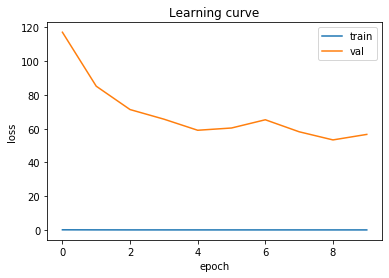

In [330]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Learning curve')
plt.legend()
plt.show()

# 【問題8】（アドバンス課題）誤分類の確認
誤分類した画像はどのようなものだったかを確認してください。推定値を用意し、以下のコードを実行してください。

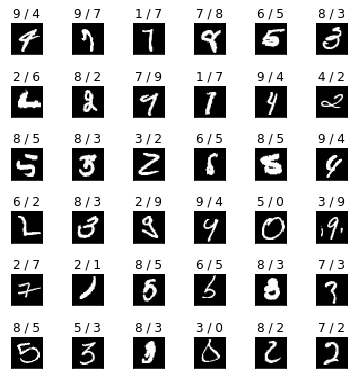

In [346]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""

num = 36 # いくつ表示するか
true_false = y_pred==y_val.argmax(axis=1)
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]].argmax()))
    ax.imshow(X_val[:,1:].reshape(-1,28,28)[false_list[i]], cmap='gray')